In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.rollingstone.com.co/themes/site_themes/rollingstone/images/img-notas/migos-nota.jpg")


## Introduction:

The Migos are a very popular hip-hop trio from Atlanta. Composed of three rappers: Quavo, Offset, and Takeoff. They specialize in southern style hip-hop/trap music. Quavo has recently released his latest solo album, "QUAVO HUNCHO"; while Takeoff has also released his first solo album, "The Last Rocket." The question then arises, who is the most popular Migo?

To answer this question I will be using Spotify's API and Twitter's API to gather data on the current popularity of each artist. I will first gather Spotify data using the 'spotipy' library. Using that data we want to view their current popularity scores, followers, and top 10 tracks. I'll create dataframes for each artist, visualizing their top ten tracks and comparing their scores. 

I will then gather a random sample of 5000 tweets from Twitter's API, store them in a dataframe and analyze the tweets to see which name has the highest frequency. 

## Spotify data:


In [7]:
# spotify
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials('67a7dbcd3bfb44878dfc8998f7dd6d58', '12cd9ee9b0014d5ab104d5c3c51a8eef')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [8]:
takeoff = sp.artist("spotify:artist:3EW0kQ1skZiK1NHg3Spt9J")
offset = sp.artist("spotify:artist:4DdkRBBYG6Yk9Ka8tdJ9BW")
quavo = sp.artist("spotify:artist:0VRj0yCOv2FXJNP47XQnx5")
print("Takeoff popularity score ", takeoff["popularity"])
print("Offset popularity score ", offset["popularity"])
print("Quavo popularity score ", quavo["popularity"])

Takeoff popularity score  73
Offset popularity score  90
Quavo popularity score  92


In [9]:
print("Takeoff followers ", takeoff["followers"]["total"])
print("Offset followers ", offset["followers"]["total"])
print("Quavo followers ", quavo["followers"]["total"])

Takeoff followers  152825
Offset followers  637526
Quavo followers  2214942


## Findings:

- Quavo has the highest popularity score 92. Takeoff has the lowest popularity score 73 - the score has risen since his latest album release.
- Quavo has the most followers on Spotify 2,214,942. Takeoff has the lowest number of followers out of the Migos 152,825.

Let's now explore their top tracks and their current popularity scores on Spotify, store them in a dataframe, then visualize them.

### Takeoff

In [26]:
takeoff_top_tracks = sp.artist_top_tracks("spotify:artist:3EW0kQ1skZiK1NHg3Spt9J", country='US')
takeoff_tracks = []
tkoff_names = []
for track in takeoff_top_tracks["tracks"]:
    print(track["name"], track["popularity"])
    takeoff_tracks.append(track["popularity"])
    tkoff_names.append(track["name"])

Last Memory 63
Casper 67
She Gon Wink 66
Martian 65
We The Ones 64
Vacation 64
None To Me 63
I Remember 62
Lead The Wave 62
Insomnia 62


In [17]:
# average
import numpy as np
print("Average track popularity ", np.mean(takeoff_tracks))

Average track popularity  63.8


In [27]:
import pandas as pd
takeoff = pd.DataFrame({"track_name": tkoff_names,
                        "popularity":takeoff_tracks})
takeoff

,popularity,track_name
0,63,Last Memory
1,67,Casper
2,66,She Gon Wink
3,65,Martian
4,64,We The Ones
5,64,Vacation
6,63,None To Me
7,62,I Remember
8,62,Lead The Wave
9,62,Insomnia


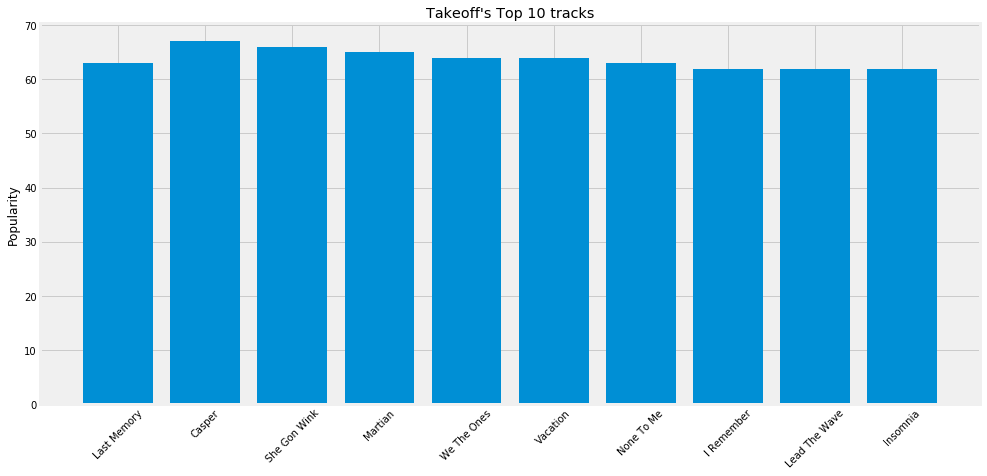

In [31]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline
plt.figure(figsize=(15,7))
plt.bar(x=takeoff["track_name"], height=takeoff["popularity"])
plt.xticks(rotation=45)
plt.title("Takeoff's Top 10 tracks")
plt.ylabel("Popularity")
plt.show()

### Quavo

In [32]:
quavo_top_tracks = sp.artist_top_tracks("spotify:artist:0VRj0yCOv2FXJNP47XQnx5", country="US")
quavo_tracks = []
qvo_names = []
for track in quavo_top_tracks["tracks"]:
    print(track["name"], track["popularity"])
    quavo_tracks.append(track["popularity"])
    qvo_names.append(track["name"])

No Brainer 91
WORKIN ME 74
PASS OUT (feat. 21 Savage) 84
FLIP THE SWITCH (feat. Drake) 82
LOSE IT (feat. Lil Baby) 81
BIGGEST ALLEY OOP 77
RERUN (feat. Travis Scott) 77
Ice Tray 75
HUNCHO DREAMS 75
LAMB TALK 69


In [21]:
# average
print("Average track popularity ", np.mean(quavo_tracks))

Average track popularity  78.5


In [33]:
quavo = pd.DataFrame({"track_name": qvo_names,
                        "popularity": quavo_tracks})
quavo

,popularity,track_name
0,91,No Brainer
1,74,WORKIN ME
2,84,PASS OUT (feat. 21 Savage)
3,82,FLIP THE SWITCH (feat. Drake)
4,81,LOSE IT (feat. Lil Baby)
5,77,BIGGEST ALLEY OOP
6,77,RERUN (feat. Travis Scott)
7,75,Ice Tray
8,75,HUNCHO DREAMS
9,69,LAMB TALK


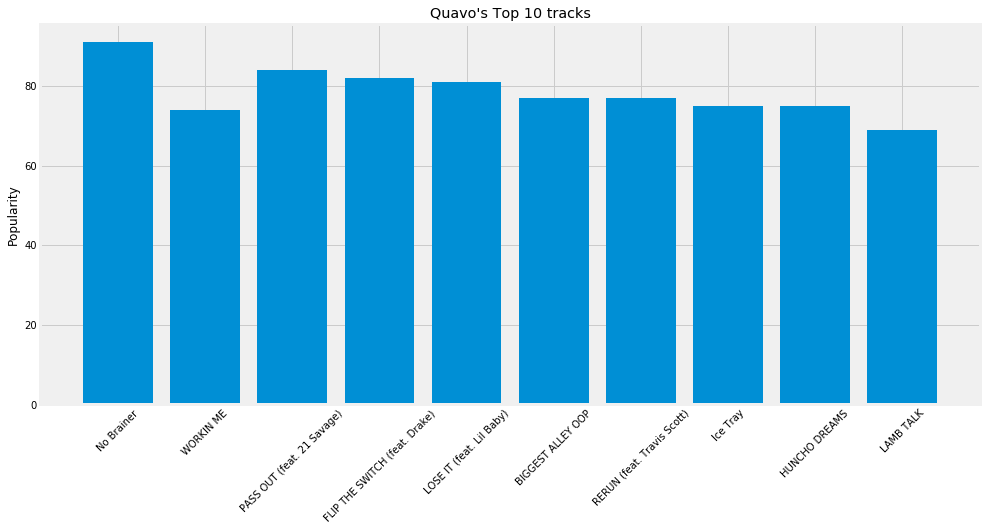

In [34]:
plt.figure(figsize=(15,7))
plt.bar(x=quavo["track_name"], height=quavo["popularity"])
plt.xticks(rotation=45)
plt.title("Quavo's Top 10 tracks")
plt.ylabel("Popularity")
plt.show()

### Offset

In [35]:
offset_top_tracks = sp.artist_top_tracks("spotify:artist:4DdkRBBYG6Yk9Ka8tdJ9BW", country="US")
offset_tracks = []
off_names = []
for track in offset_top_tracks["tracks"]:
    print(track["name"], track["popularity"])
    offset_tracks.append(track["popularity"])
    off_names.append(track["name"])

Ric Flair Drip (& Metro Boomin) 86
Ghostface Killers 76
Alive (with Offset & 2 Chainz) 72
Rap Saved Me 71
Met Gala (feat. Offset) 70
Pray For The Drip (feat. Offset) 68
Mad Stalkers 65
Nightmare 65
Disrespectful 64
Still Serving 63


In [22]:
# average
print("Average track popularity ", np.mean(offset_tracks))

Average track popularity  70.0


In [36]:
offset = pd.DataFrame({"track_name": off_names,
                        "popularity": offset_tracks})
offset

,popularity,track_name
0,86,Ric Flair Drip (& Metro Boomin)
1,76,Ghostface Killers
2,72,Alive (with Offset & 2 Chainz)
3,71,Rap Saved Me
4,70,Met Gala (feat. Offset)
5,68,Pray For The Drip (feat. Offset)
6,65,Mad Stalkers
7,65,Nightmare
8,64,Disrespectful
9,63,Still Serving


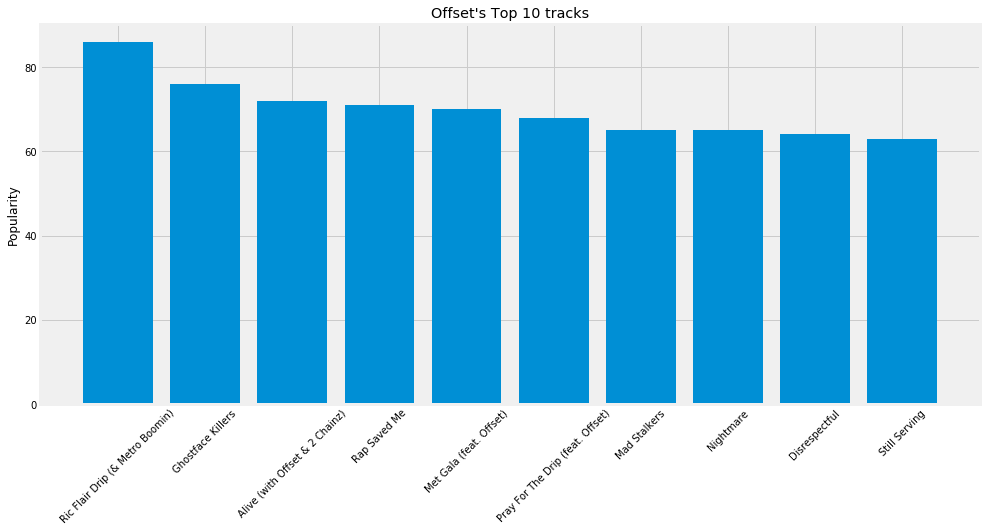

In [37]:
plt.figure(figsize=(15,7))
plt.bar(x=offset["track_name"], height=offset["popularity"])
plt.xticks(rotation=45)
plt.title("Offset's Top 10 tracks")
plt.ylabel("Popularity")
plt.show()

## Findings:

- Quavo has the highest average track popularity score 78.5. Takeoff again has the lowest average track popularity 63.8.
- Takeoff has a fairly uniform distribution of track popularity scores, this could be due to his recent album - most of the tracks are from that album.

Going off popularity scores, track popularity, and total followers, it appears that Quavo is the most populary Migo on Spotify. Let's now take a look at what people are saying on twitter. 


## Twitter data:

In order to do this I will use Twitters GET statuses/sample API. Using the tweepy library and OAuth tokens to authenticate my credentials, we can then access a random sample of twitter data. I will need to create a StreamListener class to stream the tweets into a file, "tweets2.txt". With the StreamListener I can then filter Twitter Streams to capture data by the keywords: "Takeoff", "Quavo", and "Offset."

In [38]:
import tweepy, json

# Store OAuth authentication credentials in relevant variables
access_token = "1058146506975444993-A6AdRlmFWJAXasn07kQrzTQLfea0bz"
access_token_secret = "iVlLH9fBzXqDrrZpPrxni5YcDlq9hqvUbdQZN1EwaZLXo"
consumer_key = "KENcuXIfS0HJ9kpqEIeX4jeGJ"
consumer_secret = "x8Z92urBjrNk1dEjn94i45b3esUNiPltQFubfOj1vQYVUkm4JA"

# Pass OAuth detailF326apYMUMrg7DMuIUdr27zwB1w5ohoWFLrMvMtbaVja9NEZLJto tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [39]:
# needed to create a streamlistener class to stream tweets

class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets2.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

In [40]:
# Initialize Stream listener as listener object
listener = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, listener)


# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['takeoff','quavo','offset'])

In [41]:
# String of path to file: tweets_data_path
tweets_data_path = 'tweets2.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])


In [43]:
# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())

                                                text lang
0     Takeoff is still the best Migo always has been   en
1  Metro boomin &amp; the takeoff album  going ha...   en
2  yellow is attention is 45 degrees offset which...   en
3  baixando os álbuns do takeoff e do metro boomi...   pt
4  I added a video to a @YouTube playlist https:/...   en


In [50]:
import re

# create function to find word in text
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    
    if match:
        return True
    else:
        return False
    
# empty lists for each keyword
[takeoff, quavo, offset] = [0,0,0]

for i, v in df.iterrows():
    takeoff += word_in_text('takeoff', v["text"])
    quavo += word_in_text('quavo', v["text"])
    offset += word_in_text('offset', v["text"])

In [46]:
print("Takeoff ", takeoff)
print("Quavo ", quavo)
print("Offset ", offset)

Takeoff  46
Quavo  14
Offset  17


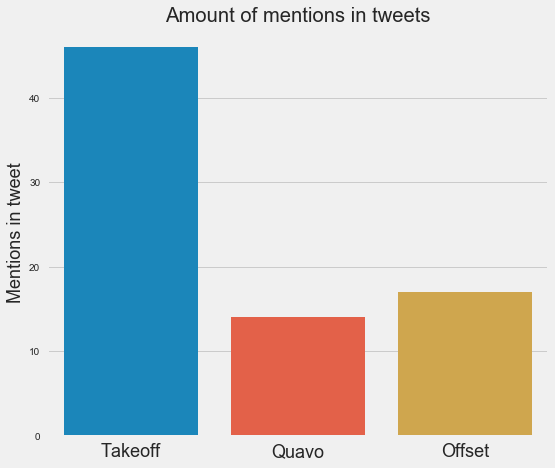

In [52]:
import seaborn as sns

# Create a list of labels: cd
cd = ['Takeoff','Quavo', 'Offset']
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,7))
ax = sns.barplot(cd, [takeoff, quavo, offset])
ax.set(ylabel='count')
plt.ylabel("Mentions in tweet",size=18)
plt.title("Amount of mentions in tweets")
plt.xticks(size=18)
plt.show()

## Findings:

After gathering the tweets, storing them into a dataframe, and then counting up the amount of times the word (their names) is mentioned in a tweet, we have found that Takeoff was mentioned the most times - 46. It appears as if Takeoff is becoming more and more popular with the release of his solo album "The Last Rocket." 


## Conclusion:

After gathering data from Spotify and twitter I have found that Quavo is the most popular Migo on Spotify; but if we look at Twitter and see who is mentioned the most, Takeoff wins. Without a common unit of measurement across Spotify and Twitter, we cannot definitively say who is most popular Migo, but we can say that Takeoff is gaining traction in popularity. Given his increasing track and overall popularity scores, as well the amount of mentions on Twitter, Takeoff is becoming a Hip-hop favorite.



Note: the data is from November 4, 2018.